In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [7]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [8]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-1.32783522  1.05254828  0.98214266 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.32284391  1.04318455 -0.60701891 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.33282653  1.03850269  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.87362627  1.77823747 -0.84539315 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.83369581  1.75014627 -1.00430931 ... -0.01556621 -0.35326426
  -0.38446649]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test )

[[ 1.26764451 -1.36797628  0.34647803 ... -0.01556621 -0.35326426
   2.60100692]
 [ 0.7036268  -0.87169852  1.61780729 ... -0.01556621 -0.35326426
   2.60100692]
 [-0.45435647 -0.45501247 -1.95780625 ... -0.01556621 -0.35326426
   2.60100692]
 ...
 [ 0.59381804 -0.74997001  0.58485227 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.19306993  0.91209231 -1.08376738 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.42267006  1.00104776  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]] [[ 0.27936569  0.20044873 -0.2891866  ... -0.01556621 -0.35326426
  -0.38446649]
 [ 0.05475686 -0.23028292  0.10810379 ... -0.01556621 -0.35326426
  -0.38446649]
 [-1.43265267  1.01509336  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]
 ...
 [-1.23799169  0.78568194 -0.2891866  ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.09498235  0.53286119  0.58485227 ... -0.01556621 -0.35326426
  -0.38446649]
 [ 0.59880935 -0.66101456 -0.92485123 ... -0.01556621 -0.35326426
  -0.38446649]] 14196    103000.

In [11]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_initial = xgb.predict(X_test)


In [12]:
print("y_pred_initial:",y_pred_initial)

y_pred_initial: [ 55710.93   78897.445 415256.5   ... 504441.94   77080.805 162029.06 ]


In [13]:
print(" Initial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_initial)))
print(" Initial MAE:", mean_absolute_error(y_test, y_pred_initial))
print(" Initial R² Score:", r2_score(y_test, y_pred_initial))

 Initial RMSE: 47309.12854248549
 Initial MAE: 31645.72550361101
 Initial R² Score: 0.8292018995127823


In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [15]:

random_search = RandomizedSearchCV(XGBRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [16]:
y_pred_best = best_model.predict(X_test)

print("\n Best Parameters:", random_search.best_params_)
print(" Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print(" Tuned MAE:", mean_absolute_error(y_test, y_pred_best))
print(" Tuned R² Score:", r2_score(y_test, y_pred_best))


 Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
 Tuned RMSE: 45640.32844733964
 Tuned MAE: 29803.491766404735
 Tuned R² Score: 0.8410389721552943


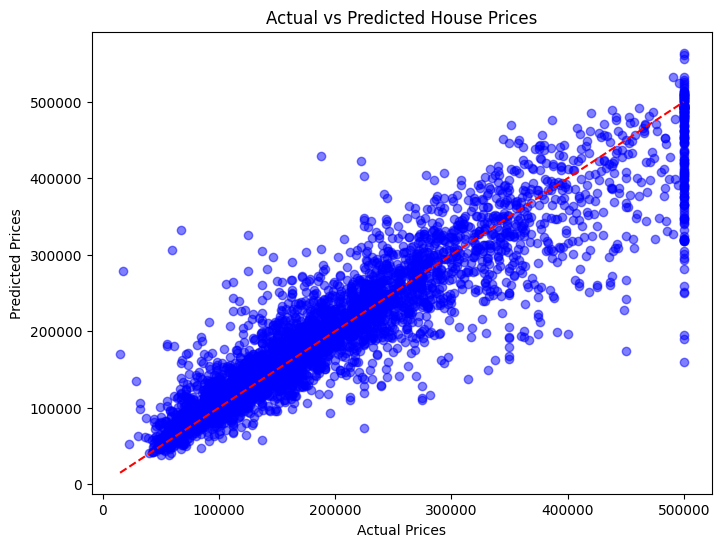

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()